In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def func(x):
    return -np.abs(np.sin(x) - 0.5 * x)

In [4]:
def init(m, n):
    return np.random.randint(2, size=(m, n))

In [5]:
# Función para decodificar
def decode(ss, a, b):
    n = ss.shape[1]
    x = []
    for s in ss:
        bin_to_int = np.array([int(j) << i for i,j in enumerate(s[::-1])]).sum()
        int_to_x = a + bin_to_int * (b - a) / (2**n - 1)
        x.append(int_to_x)
    return np.array(x)

In [6]:
# Función de seleccion
def selection(population, sample_size, fitness):
    m, n = population.shape
    new_pop = population.copy()
        
    for i in range(m):
        rand_id = np.random.choice(m, size=max(1, int(sample_size*m)), replace=False)
        max_id = rand_id[fitness[rand_id].argmax()]
        new_pop[i] = population[max_id].copy()
    
    return new_pop

In [7]:
# Función de cruza
def crossover(population, pc):
    m, n = population.shape
    new_pop = population.copy()
    
    for i in range(0, m-1, 2):
        if np.random.uniform(0, 1) < pc:
            pos = np.random.randint(0, n-1)
            new_pop[i, pos+1:] = population[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = population[i, pos+1:].copy()
            
    return new_pop

In [8]:
# Función de muta
def mutation(population, pm):
    m,n = population.shape
    new_pop = population.copy()
    mutation_prob = (np.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop) % 2

In [9]:
def print_result(gen_num, population, fitness, x):
    m = population.shape[0]
    print('=' * 68)
    print(f'Generation {gen_num} max fitness {fitness.max():0.4f} at x = {x[fitness.argmax()]:0.4f}')
    
    for i in range(m):
        print(f'# {i+1}\t{population[i]}   fitness: {fitness[i]:0.4f}')
    
    print(f'Average fitness: {fitness.mean():0.4f}')
    print('=' * 68, '\n')

In [10]:
def GeneticAlgorithm(func, pop_size, str_size, low, high, 
                     ps=0.2, pc=1.0, pm=0.1, max_iter=1000, eps=1e-5, random_state=None):
    
    np.random.seed(random_state)
    pop = init(pop_size, str_size)
    x = decode(pop, low, high)
    fitness = func(x)
    best = [fitness.max()]
    print_result(1, pop, fitness, x)
    
    i = 0
    while i < max_iter and abs(best[-1]) > eps:
        pop = selection(pop, ps, fitness)
        pop = crossover(pop, pc)
        pop = mutation(pop, pm)
        x = decode(pop, low, high)
        fitness = func(x)
        best.append(fitness.max())
        i += 1
    
    print_result(i, pop, fitness, x)
    
    if i == max_iter:
        print(i, 'maximum iteration reached!')
        print('Solution not found. Try increasing max_iter for better result.')
    else:
        print('Solution found at iteration', i)
        
    return fitness, x, best, i, pop_size

In [11]:
def plot_result(func, fs, xs, best, i, m):
    xval = np.arange(1, 3, 0.01)
    yval = func(xval)
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)
    plt.plot(xval, yval, color='m')
    plt.scatter(xs, fs, alpha=0.50)
    plt.xlim((1,3))
    plt.xlabel('$x$')
    plt.ylabel('$f(x) = -|sin(x) - 0.5x|$')
    plt.title('Population at Iteration ' + str(i) + '\n' + \
              'Number of Individuals: ' + str(m))
    
    plt.subplot(122)
    plt.plot(best, color='c')
    plt.xlim(0)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs Iteration' + '\n' + \
              'Number of Individuals: ' + str(m))
    

Generation 1 max fitness -0.0174 at x = 1.9165
# 1	[0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1]   fitness: -0.0174
# 2	[1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0]   fitness: -0.8531
# 3	[1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1]   fitness: -0.8342
# 4	[1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1]   fitness: -0.4428
# 5	[1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1]   fitness: -1.0461
# 6	[1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0]   fitness: -1.1612
# 7	[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0]   fitness: -0.1666
# 8	[0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1]   fitness: -0.2122
# 9	[0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1]   fitness: -0.1402
# 10	[0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0]   fitness: -0.3417
# 11	[0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0]   fitness: -0.1384
# 12	[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0]   fitness: -0.2935
# 13	[0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0]   fitness: -0.1177
# 14	[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0]   fitness: -0.9482
# 15	[0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 

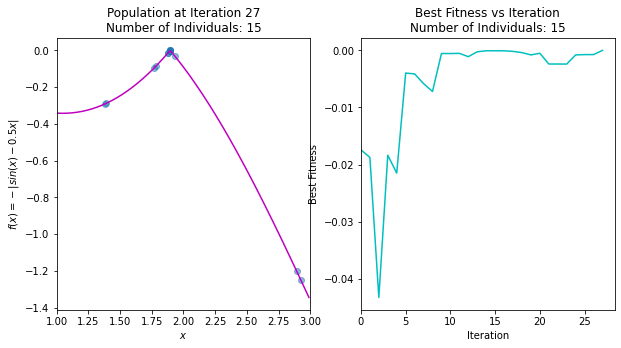

In [12]:
fs, xs, best, i, m = GeneticAlgorithm(func, pop_size=15, str_size=20, low=1, high=3, random_state=69)
plot_result(func, fs, xs, best, i, m)